In [3]:
# Установка внешнего пакета
!pip install vk_requests


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# Импорт (активация) нужных пакетов
import vk_requests    # работа с API
import time           # приостановка работы кода
import pandas as pd   # работа с таблицами

In [6]:
# Авторизация в API
token = 'vk1.a.440TDJvHhH3Wbb4q9fwVWhhwzpriQX08rqDTtVGwEQYJdyc2xWPyKBdaA8TobD0tLvbQts2-m0ZgXUMxY_Dq5_hFKoE31KQJp_C00o40_UJ4GWvoU98vNh_8C7-RJYZD9KRCkljvQUbxUSWsSD9L8I8EnZy4HSuxU6-fVN1ErCBfiCgjtV8Gkpba7wmfHkR8oTVdwV7RwDdvaCV7C9q3nA'

api = vk_requests.create_api(service_token=token)


In [7]:
# как собрать больше постов, если за один раз можно взять максимум 100?

results = []

for i in range(0, 901, 100):
  print('Шаг', int(i/100 + 1))

  response = api.groups.getMembers(group_id='russian_emptiness', offset = i, count = 100, fields = ['bdate', 'city', 'country', 'sex']) # offset - сдвиг, с какого поста нужно начать собирать
  current_results = response['items']
  results.extend(current_results)

  time.sleep(0.33)



Шаг 1
Шаг 2
Шаг 3
Шаг 4
Шаг 5
Шаг 6
Шаг 7
Шаг 8
Шаг 9
Шаг 10


In [8]:
# переведём результаты в удобную таблицу
table = pd.json_normalize(results)
table.head(500)

,id,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title,country.id,country.title,bdate,deactivated
0,7,2,Алексей,Кобылянский,False,True,295.0,London,49.0,Великобритания,NaN,NaN
1,14,2,Андрей,Городецкий,True,False,295.0,London,49.0,Великобритания,NaN,NaN
2,17,2,Александр,Беспалов,True,False,2.0,Санкт-Петербург,1.0,Россия,21.10.1982,NaN
3,272,2,Павел,Моржов,False,True,2.0,Санкт-Петербург,1.0,Россия,23.1.1986,NaN
4,297,2,Владимир,Сюткин,True,False,2.0,Санкт-Петербург,1.0,Россия,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,65161,2,Александр,Соколов,False,True,61.0,Калининград,1.0,Россия,NaN,NaN
496,65378,1,Анастасия,Черникова,True,False,1.0,Москва,1.0,Россия,26.6.1989,NaN
497,65392,1,Юлия,Киршина,True,False,2.0,Санкт-Петербург,1.0,Россия,NaN,NaN
498,65406,2,Антон,Пикалёв,True,False,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# как собрать больше постов, если за один раз можно взять максимум 100?

results1 = []

for i in range(0, 901, 100):
  print('Шаг', int(i/100 + 1))

  response = api.groups.getMembers(group_id='al_bertina', offset = i, count = 100, fields = ['bdate', 'city', 'country', 'sex']) # offset - сдвиг, с какого поста нужно начать собирать
  current_results = response['items']
  results1.extend(current_results)

  time.sleep(0.33)

Шаг 1
Шаг 2
Шаг 3
Шаг 4
Шаг 5
Шаг 6
Шаг 7
Шаг 8
Шаг 9
Шаг 10


In [10]:
# переведём результаты в удобную таблицу
table1 = pd.json_normalize(results1)
table1.head(500)

,id,bdate,sex,deactivated,first_name,last_name,can_access_closed,is_closed,city.id,city.title,country.id,country.title
0,47,30.7.1989,2,deleted,Габриел,Шалел,True,False,1.0,Москва,NaN,NaN
1,490,30.11,1,deleted,Елена,Ящике,False,True,2.0,Санкт-Петербург,NaN,NaN
2,726,30.1.1989,1,NaN,Екатерина,Сысоева,True,False,2.0,Санкт-Петербург,1.0,Россия
3,849,NaN,1,NaN,Анна,Юшина,True,False,NaN,NaN,1.0,Россия
4,895,25.3.1984,2,NaN,Паша,Фёдоров,False,True,2.0,Санкт-Петербург,1.0,Россия
...,...,...,...,...,...,...,...,...,...,...,...,...
495,35273,27.4.1988,1,NaN,Екатерина,Рууска,True,False,2.0,Санкт-Петербург,1.0,Россия
496,35290,14.10.1986,1,NaN,Елена,Гриман,False,True,NaN,NaN,NaN,NaN
497,35410,16.10.1988,1,NaN,Даяна,Гедерим,True,False,2.0,Санкт-Петербург,1.0,Россия
498,35413,26.12,2,NaN,Сергей,Ткаченко,False,True,2.0,Санкт-Петербург,1.0,Россия


In [11]:
# Проведем анализ Таблицы1 и Таблицы2

table.head(10)


,id,sex,first_name,last_name,can_access_closed,is_closed,city.id,city.title,country.id,country.title,bdate,deactivated
0,7,2,Алексей,Кобылянский,False,True,295.0,London,49.0,Великобритания,NaN,NaN
1,14,2,Андрей,Городецкий,True,False,295.0,London,49.0,Великобритания,NaN,NaN
2,17,2,Александр,Беспалов,True,False,2.0,Санкт-Петербург,1.0,Россия,21.10.1982,NaN
3,272,2,Павел,Моржов,False,True,2.0,Санкт-Петербург,1.0,Россия,23.1.1986,NaN
4,297,2,Владимир,Сюткин,True,False,2.0,Санкт-Петербург,1.0,Россия,NaN,NaN
5,431,1,Мария,Ажинова,False,True,2.0,Санкт-Петербург,1.0,Россия,14.11.1985,NaN
6,445,2,Филипп,Рамбов,True,False,2.0,Санкт-Петербург,1.0,Россия,21.6,NaN
7,479,1,Виктория,Стацевич,True,False,2.0,Санкт-Петербург,1.0,Россия,23.4.1989,NaN
8,496,2,Григорий,Малыгин,True,False,2.0,Санкт-Петербург,1.0,Россия,30.12.1989,NaN
9,710,2,Иннокентий,Головкин,True,False,2.0,Санкт-Петербург,1.0,Россия,7.1.1986,NaN


In [33]:
filled_table = table.fillna(0)

filled_table.head(10)

list_of_id = []

for i in filled_table['id']:
  list_of_id.append(i)

print(list_of_id)

list_of_city_id = []

for i in filled_table['city.id']:
  list_of_city_id.append(int(i))

print(list_of_city_id)



[7, 14, 17, 272, 297, 431, 445, 479, 496, 710, 726, 779, 799, 832, 908, 979, 1025, 1097, 1132, 1384, 1810, 1820, 2169, 2322, 2400, 2481, 2857, 2908, 2911, 2932, 3052, 3142, 3223, 3264, 3326, 3388, 3545, 3665, 3918, 4000, 4086, 4119, 4159, 4244, 4296, 4414, 4605, 4643, 4661, 4662, 4731, 4858, 4997, 5010, 5224, 5276, 5391, 5615, 5665, 5727, 5742, 5870, 6023, 6134, 6150, 6229, 6247, 6400, 6782, 6943, 6985, 7096, 7237, 7799, 8107, 8147, 8216, 8397, 8419, 8505, 8790, 8890, 9079, 9105, 9139, 9147, 9237, 9285, 9322, 9343, 9547, 9567, 9629, 10046, 10155, 10236, 10380, 10413, 10483, 10931, 10996, 11199, 11200, 11422, 11472, 11543, 11585, 11653, 11689, 11757, 11926, 11946, 11948, 11998, 12013, 12087, 12097, 12231, 12360, 12481, 12509, 12631, 12685, 12690, 12700, 12707, 13182, 13396, 13509, 13534, 13557, 13662, 13688, 13707, 13877, 14039, 14173, 14194, 14586, 14630, 14688, 14751, 15087, 15195, 15250, 15532, 15559, 15645, 15744, 15762, 15844, 15854, 15879, 15972, 15990, 15991, 16241, 16253, 16474,

In [13]:
print(filled_table.describe())

                  id         sex       city.id   country.id
count    1000.000000  1000.00000  1.000000e+03  1000.000000
mean    66543.453000     1.41600  5.124267e+04     4.987000
std     42132.968875     0.49314  3.902392e+05    24.726306
min         7.000000     1.00000  0.000000e+00     0.000000
25%     28319.250000     1.00000  1.000000e+00     1.000000
50%     65440.000000     1.00000  2.000000e+00     1.000000
75%    102401.250000     2.00000  2.000000e+00     1.000000
max    142430.000000     2.00000  5.479328e+06   229.000000


In [14]:
sex = filled_table['sex'].replace([1,2],['female', 'male'])

print(sex.mode()[0])

print(filled_table.mode()['city.title'][0])

print(filled_table.mode()['country.title'][0])

print(filled_table.mode()['first_name'][0])

female
Санкт-Петербург
Россия
Александр


In [15]:
filled_table1 = table1.fillna(0)

filled_table1.head(10)

,id,bdate,sex,deactivated,first_name,last_name,can_access_closed,is_closed,city.id,city.title,country.id,country.title
0,47,30.7.1989,2,deleted,Габриел,Шалел,True,False,1.0,Москва,0.0,0
1,490,30.11,1,deleted,Елена,Ящике,False,True,2.0,Санкт-Петербург,0.0,0
2,726,30.1.1989,1,0,Екатерина,Сысоева,True,False,2.0,Санкт-Петербург,1.0,Россия
3,849,0,1,0,Анна,Юшина,True,False,0.0,0,1.0,Россия
4,895,25.3.1984,2,0,Паша,Фёдоров,False,True,2.0,Санкт-Петербург,1.0,Россия
5,991,0,2,banned,Дмитрий,Горнизов,True,False,1.0,Москва,0.0,0
6,1025,7.3,1,banned,Александра,Подзоров,True,False,60.0,Казань,0.0,0
7,1031,0,1,deleted,DELETED,,False,True,0.0,0,0.0,0
8,1063,28.3.1977,2,0,Александр,Гаген-Торн,True,False,1941.0,Auckland,142.0,Новая Зеландия
9,1118,5.6,1,0,Виктория,Петренко,True,False,2.0,Санкт-Петербург,1.0,Россия


In [16]:
filled_table1.head(10)

,id,bdate,sex,deactivated,first_name,last_name,can_access_closed,is_closed,city.id,city.title,country.id,country.title
0,47,30.7.1989,2,deleted,Габриел,Шалел,True,False,1.0,Москва,0.0,0
1,490,30.11,1,deleted,Елена,Ящике,False,True,2.0,Санкт-Петербург,0.0,0
2,726,30.1.1989,1,0,Екатерина,Сысоева,True,False,2.0,Санкт-Петербург,1.0,Россия
3,849,0,1,0,Анна,Юшина,True,False,0.0,0,1.0,Россия
4,895,25.3.1984,2,0,Паша,Фёдоров,False,True,2.0,Санкт-Петербург,1.0,Россия
5,991,0,2,banned,Дмитрий,Горнизов,True,False,1.0,Москва,0.0,0
6,1025,7.3,1,banned,Александра,Подзоров,True,False,60.0,Казань,0.0,0
7,1031,0,1,deleted,DELETED,,False,True,0.0,0,0.0,0
8,1063,28.3.1977,2,0,Александр,Гаген-Торн,True,False,1941.0,Auckland,142.0,Новая Зеландия
9,1118,5.6,1,0,Виктория,Петренко,True,False,2.0,Санкт-Петербург,1.0,Россия


In [17]:
sex = filled_table1['sex'].replace([1,2],['female', 'male'])

print(sex.mode()[0])

print(filled_table1.mode()['city.title'][0])

print(filled_table1.mode()['country.title'][0])

print(filled_table1.mode()['first_name'][0])

female
Санкт-Петербург
Россия
Анна


In [18]:
print(filled_table['city.title'].isin(filled_table1['city.title']).value_counts())

True     924
False     76
Name: city.title, dtype: int64


In [19]:
pd.merge(filled_table, filled_table1, on=['bdate'], how='inner')

,id_x,sex_x,first_name_x,last_name_x,can_access_closed_x,is_closed_x,city.id_x,city.title_x,country.id_x,country.title_x,...,sex_y,deactivated_y,first_name_y,last_name_y,can_access_closed_y,is_closed_y,city.id_y,city.title_y,country.id_y,country.title_y
0,7,2,Алексей,Кобылянский,False,True,295.0,London,49.0,Великобритания,...,1,0,Анна,Юшина,True,False,0.0,0,1.0,Россия
1,7,2,Алексей,Кобылянский,False,True,295.0,London,49.0,Великобритания,...,2,banned,Дмитрий,Горнизов,True,False,1.0,Москва,0.0,0
2,7,2,Алексей,Кобылянский,False,True,295.0,London,49.0,Великобритания,...,1,deleted,DELETED,,False,True,0.0,0,0.0,0
3,7,2,Алексей,Кобылянский,False,True,295.0,London,49.0,Великобритания,...,1,0,Anastasia,Pakkar,True,False,2.0,Санкт-Петербург,1.0,Россия
4,7,2,Алексей,Кобылянский,False,True,295.0,London,49.0,Великобритания,...,1,banned,Анна,Эберт,True,False,3296.0,Тель-Авив,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73369,136122,1,Татьяна,Пахомова,True,False,2.0,Санкт-Петербург,1.0,Россия,...,1,0,Мария,Киселева,True,False,2.0,Санкт-Петербург,1.0,Россия
73370,136463,1,Мери,Самойлова,True,False,123.0,Самара,1.0,Россия,...,2,0,Asya,Ilina,False,True,2.0,Санкт-Петербург,1.0,Россия
73371,136463,1,Мери,Самойлова,True,False,123.0,Самара,1.0,Россия,...,1,0,Юлия,Липилина,True,False,1.0,Москва,1.0,Россия
73372,139142,1,Дарья,Голоушкина,True,False,2.0,Санкт-Петербург,1.0,Россия,...,1,0,Елена,Гайнулина,True,False,2.0,Санкт-Петербург,1.0,Россия


In [20]:
list_names = []
list1_names = []
for i in range(len(filled_table['first_name'])):
  list_names.append(filled_table['first_name'][i] + ' ' + filled_table['last_name'][i])

for i in range(len(filled_table1['first_name'])):
  list1_names.append(filled_table1['first_name'][i] + ' ' + filled_table1['last_name'][i])

counter = 0
for i in list_names:
  if i in list1_names:
    counter += 1

print(counter)
print(len(set(list_names).intersection(set(list1_names))))

88
87


In [21]:
list_city = []
list1_city = []
for i in range(len(filled_table['city.title'])):
  list_city.append(filled_table['city.title'][i])

for i in range(len(filled_table1['city.title'])):
  list1_city.append(filled_table1['city.title'][i])

print(len(set(list_city).intersection(set(list1_city))))

34


In [24]:
coder_fam = {}

for i in range(len(list_names)):
  if list_names[i] not in coder_fam:
    coder_fam.update({list_names[i]:i})
coder_city = {}
for i in range(len(list_city)):
  if list_city[i] not in coder_city:
    coder_city.update({list_city[i]:i})
print(coder_fam)

print(coder_city)

{'Алексей Кобылянский': 0, 'Андрей Городецкий': 1, 'Александр Беспалов': 2, 'Павел Моржов': 3, 'Владимир Сюткин': 4, 'Мария Ажинова': 5, 'Филипп Рамбов': 6, 'Виктория Стацевич': 7, 'Григорий Малыгин': 8, 'Иннокентий Головкин': 9, 'Екатерина Сысоева': 10, 'Екатерина Норкина': 11, 'Руслан Гиниятуллин': 12, 'Антон Спартаков': 13, 'Георгий Челидзе': 14, 'Малик Малик': 15, 'Александра Подзоров': 16, 'Ксения Захарова': 17, 'Виктория Макаров': 18, 'Ася Киреева': 19, 'Андрей Безруков': 20, 'Pervin Mohammadzade': 21, 'Мисс Дарьюшка': 22, 'Надежда Мариани': 23, 'Алина Петрова': 24, 'Александр Охотин': 25, 'Александр Полынов': 26, 'Александр Князев': 27, 'Сергей Тарасов': 28, 'Кирилл Когортов': 29, 'Pavel Vasilyev': 30, 'Юлия Королькова': 31, 'Александр Александрович': 32, 'Елена Лебединская': 33, 'Андрей Ерёменок': 34, 'Владислав Шаклеин': 35, 'Ирина Кирилова': 36, 'Катя Высоцкая': 37, 'Татьяна Алексеева': 38, 'Александра Сомова': 39, 'Мария Соболева': 40, 'Ыыыыы Ййййй': 41, 'Anton Pronoza': 42,

In [44]:
import community
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [27]:
print(len(coder_city))

print(len(coder_fam))

99
999


In [30]:
list_of_id = []

for i in filled_table['id']:
  list_of_id.append(i)

print(list_of_id)

[7, 14, 17, 272, 297, 431, 445, 479, 496, 710, 726, 779, 799, 832, 908, 979, 1025, 1097, 1132, 1384, 1810, 1820, 2169, 2322, 2400, 2481, 2857, 2908, 2911, 2932, 3052, 3142, 3223, 3264, 3326, 3388, 3545, 3665, 3918, 4000, 4086, 4119, 4159, 4244, 4296, 4414, 4605, 4643, 4661, 4662, 4731, 4858, 4997, 5010, 5224, 5276, 5391, 5615, 5665, 5727, 5742, 5870, 6023, 6134, 6150, 6229, 6247, 6400, 6782, 6943, 6985, 7096, 7237, 7799, 8107, 8147, 8216, 8397, 8419, 8505, 8790, 8890, 9079, 9105, 9139, 9147, 9237, 9285, 9322, 9343, 9547, 9567, 9629, 10046, 10155, 10236, 10380, 10413, 10483, 10931, 10996, 11199, 11200, 11422, 11472, 11543, 11585, 11653, 11689, 11757, 11926, 11946, 11948, 11998, 12013, 12087, 12097, 12231, 12360, 12481, 12509, 12631, 12685, 12690, 12700, 12707, 13182, 13396, 13509, 13534, 13557, 13662, 13688, 13707, 13877, 14039, 14173, 14194, 14586, 14630, 14688, 14751, 15087, 15195, 15250, 15532, 15559, 15645, 15744, 15762, 15844, 15854, 15879, 15972, 15990, 15991, 16241, 16253, 16474,

In [34]:
print(len(list_of_id))

print(len(list_of_city_id))

1000
1000


In [36]:
f1 = open('edge_list.txt', 'w', encoding='utf-8')

for i in range(len(list_of_id)):
  print(list_of_id[i], list_of_city_id[i], file = f1)

f1.close()

In [37]:
G = nx.read_edgelist('edge_list.txt', create_using=nx.DiGraph())
print('Количество вершин: {}'.format(G.number_of_nodes()))
print('Количество рёбер: {}'.format(G. number_of_edges()))
print(' Среднее количество соседей у узлов в графе: {}'.format(round(G.number_of_edges() / float(G.number_of_nodes()), 4)))

Количество вершин: 1097
Количество рёбер: 1000
 Среднее количество соседей у узлов в графе: 0.9116


In [38]:
if nx.is_directed(G):
  if nx.is_weakly_connected(G):
    print('Граф является направленным и состоит из одной компоненты слабой связности.')
  else:
    print('Граф является направленным и состоит из нескольких компонент.')
else:
  if nx.is_connected(G):
    print('Граф является ненаправленным и связным.')
  else:
    print('Граф является ненаправленным и состоит из нескольких компонент.')

Граф является направленным и состоит из нескольких компонент.


In [39]:
G_weak = G.subgraph(max(nx.weakly_connected_components(G), key=len))
print('Количество вершин: {}'.format(G_weak.number_of_nodes()))
print('Количество рёбер: {}'.format(G_weak.number_of_edges()))
print('Среднее количество соседей у узла в графе: {}'.format(round(G_weak.number_of_edges() / float(G_weak.number_of_nodes()), 4)))
G_strong = G.subgraph(max(nx.strongly_connected_components(G), key=len))
print('Количество вершин: {}'.format(G_strong.number_of_nodes()))
print('Количество рёбер: {}'.format(G_strong.number_of_edges()))
print('Среднее количество соседей у узла в графе: {}'.format(round(G_strong.number_of_edges() / float(G_strong.number_of_nodes()), 4)))

Количество вершин: 486
Количество рёбер: 485
Среднее количество соседей у узла в графе: 0.9979
Количество вершин: 1
Количество рёбер: 0
Среднее количество соседей у узла в графе: 0.0


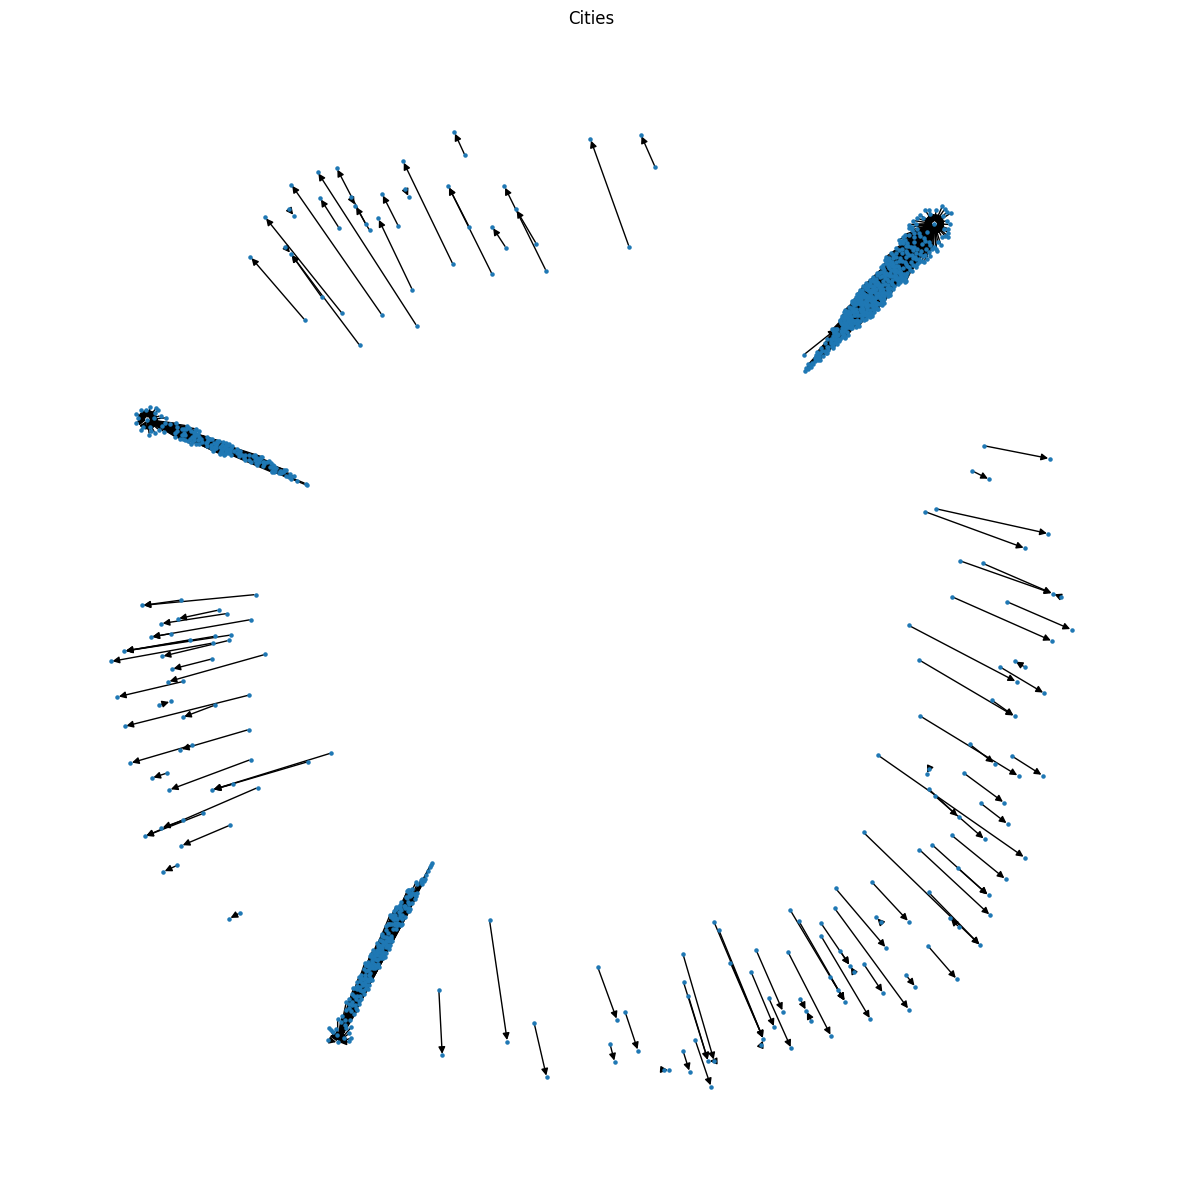

In [40]:
plt.figure(figsize=(15, 15))
plt.title('Cities')
nx.draw(G, node_size=5)
plt.show()

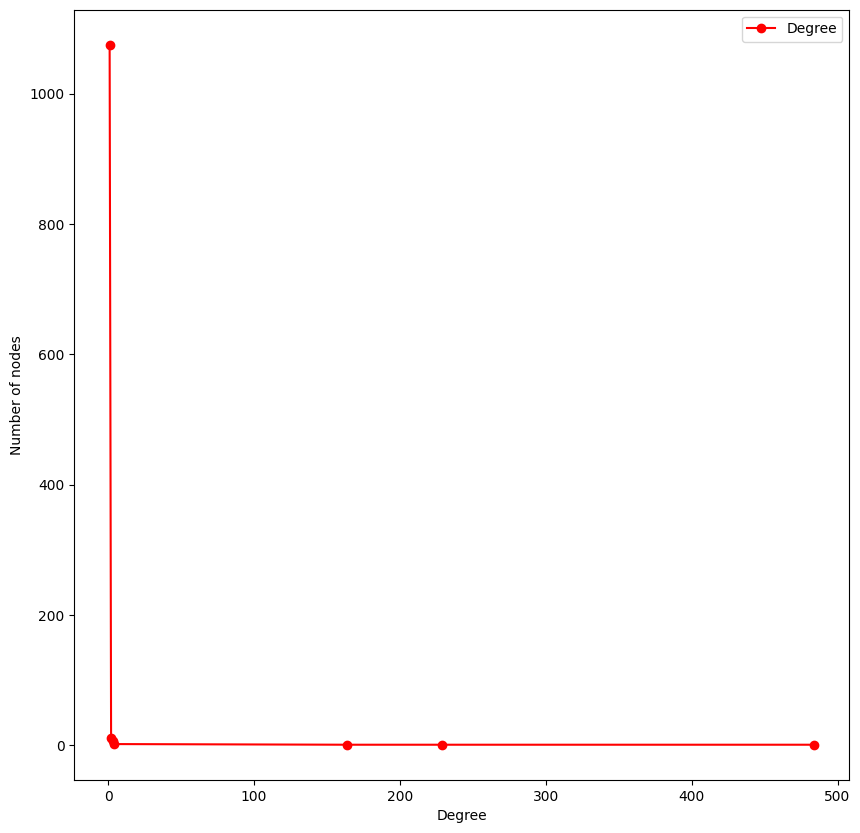

In [42]:
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()

In [48]:
!pip uninstall community
import community.community_louvain as cl

Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.10/dist-packages/community/community_status.py
Proceed (Y/n)? y
  Successfully uninstalled community-1.0.0b1


Количество сообществ:  2
Количество элементов в выделенных сообществах: 2, 5


<ipython-input-50-68821533ad6d>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)


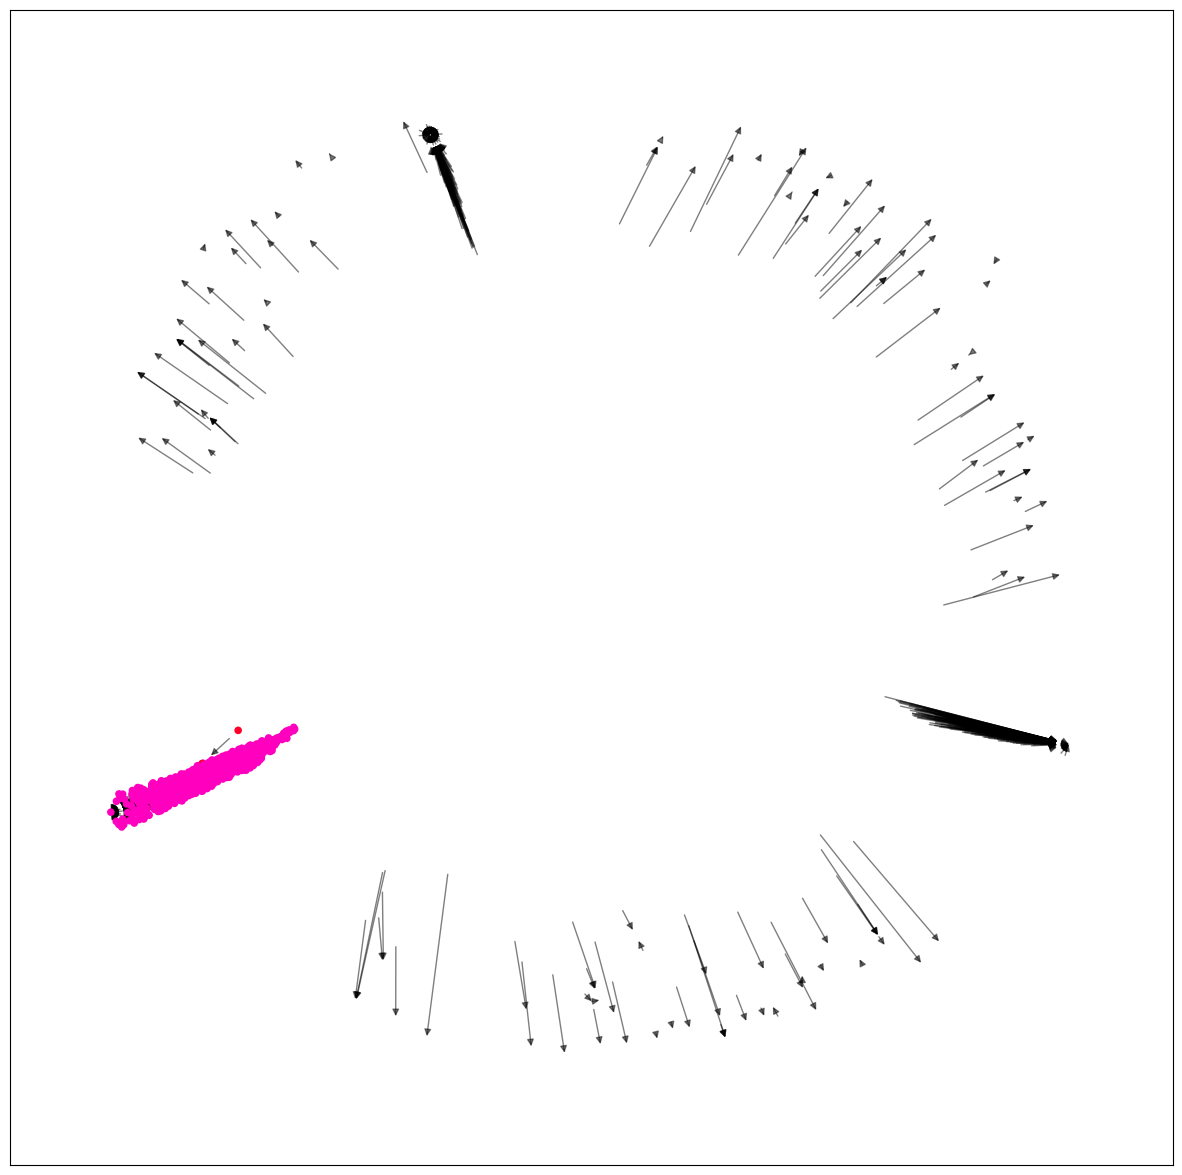

In [50]:
G_undirected = G_weak.to_undirected()
partition = cl.best_partition(G_undirected)
communities = set(partition.values())
communities_dict = {c: [k for k, v in partition.items() if v == c] for c in communities}
highest_degree = {k: sorted(v, key=lambda x: G.degree(x))[-5:] for k, v in communities_dict.items()}
print('Количество сообществ: ', len(highest_degree))
print('Количество элементов в выделенных сообществах:', ', '.join([str(len(highest_degree[key])) for key in highest_degree]))

pos = nx.spring_layout(G)

plt.figure(figsize=(15, 15))

cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)

nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()

[1, 2, 2, 0, 2, 1, 60, 0, 1941, 2, 2, 2, 964, 73, 3296, 2, 2, 1, 0, 2, 2, 95, 2, 2, 2, 1046160, 1, 122, 2, 2, 1, 1, 0, 2, 2, 78, 2, 0, 60, 2, 1803186, 1933924, 1951986, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 49, 2, 2, 2, 2, 2, 1, 2, 223, 0, 467, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 198, 2, 0, 2, 0, 1, 2, 2, 125, 2, 2, 1, 1, 98, 2, 2, 2, 1, 0, 1, 2, 122, 1, 2, 183, 1, 1, 0, 1803702, 2, 106, 2, 2, 2, 0, 5511527, 1, 1, 1, 2, 1, 2, 2, 1, 1702, 1, 1, 2, 2, 72, 2, 2, 2, 1, 2, 2, 0, 2, 95, 1905655, 0, 2, 0, 2, 2, 49, 2, 2, 0, 1, 2, 2, 1, 1, 141, 1, 1, 1, 1, 1, 0, 144, 1, 61, 2722528, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 99, 2, 1, 0, 74, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0, 60, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 621, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 32, 1, 1, 1, 2, 2, 125, 1, 1, 74, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 0, 1, 49, 2, 5264302, 2, 42, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1914764, 2, 2, 2, 1, 2

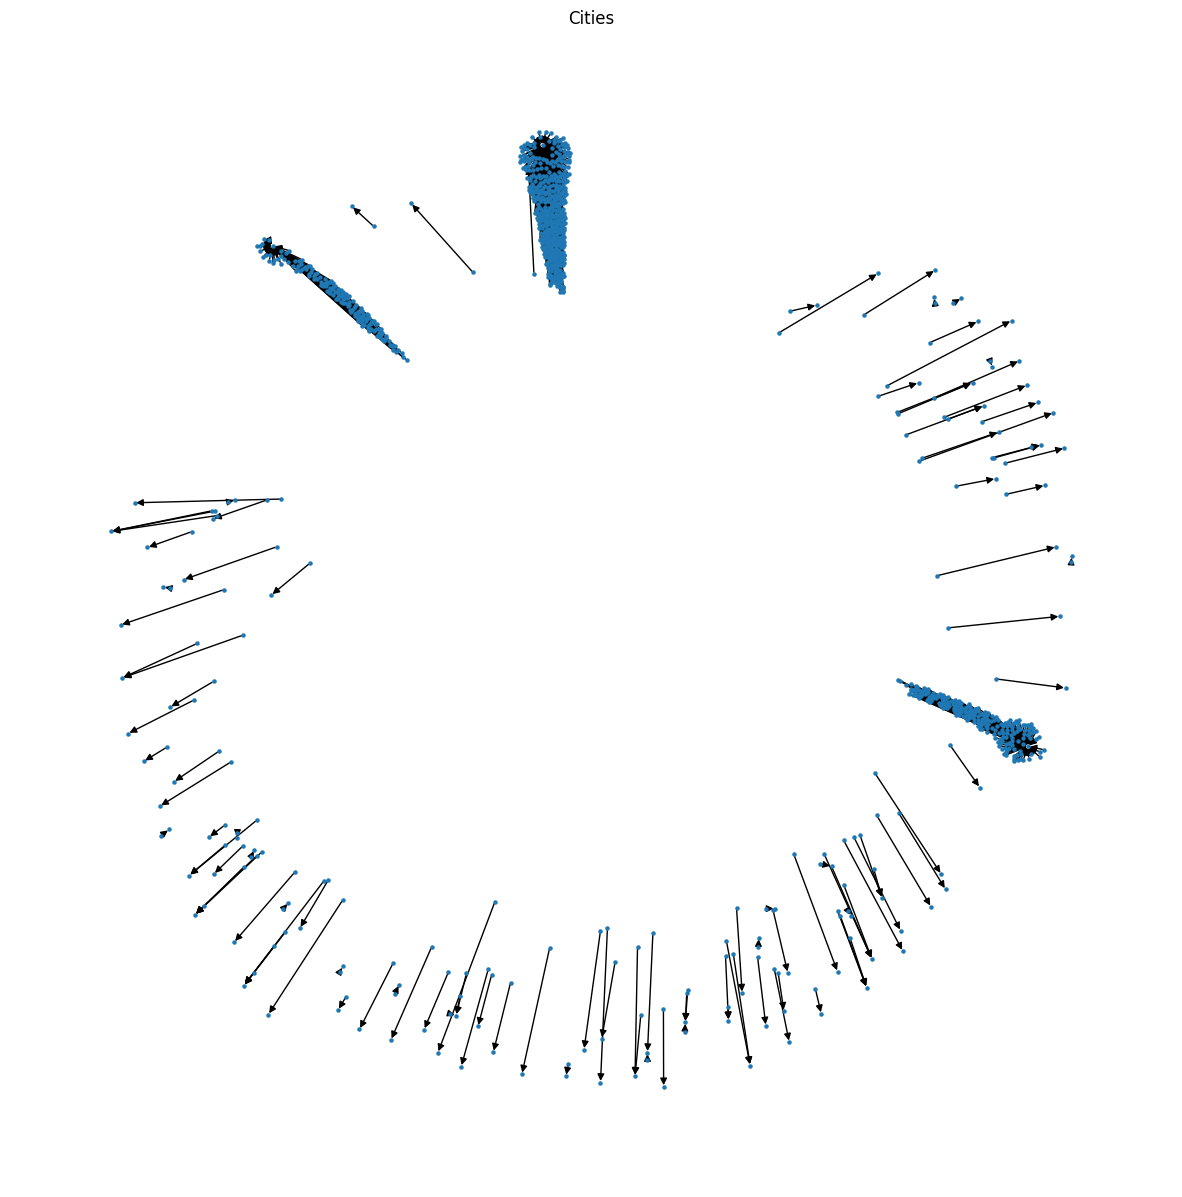

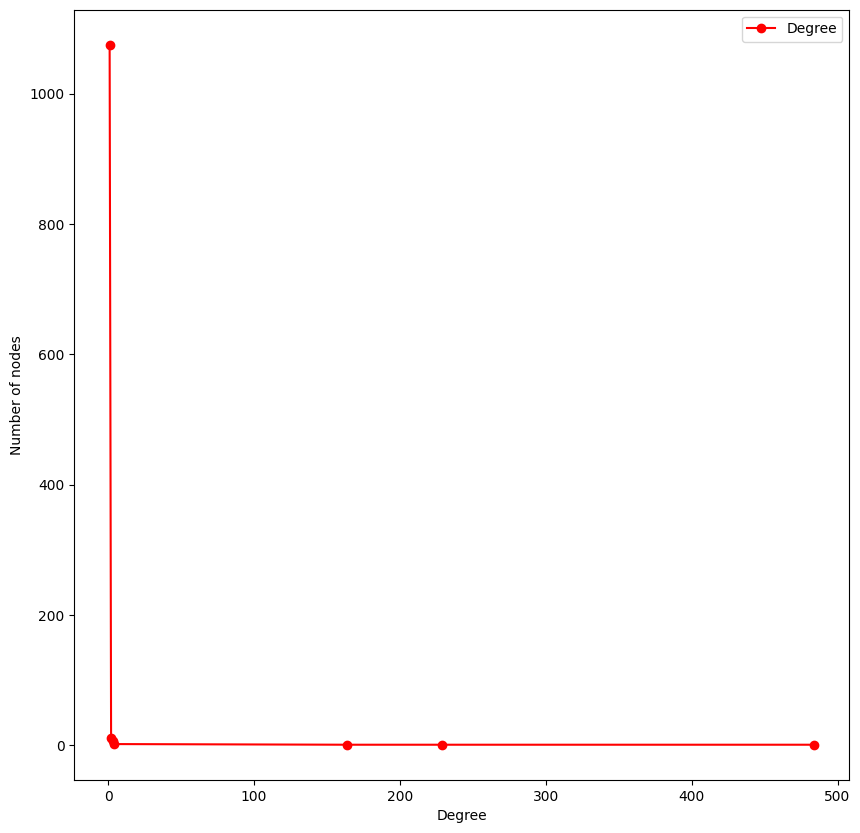

Количество сообществ:  2
Количество элементов в выделенных сообществах: 2, 5


<ipython-input-51-bc4a4cae5238>:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)


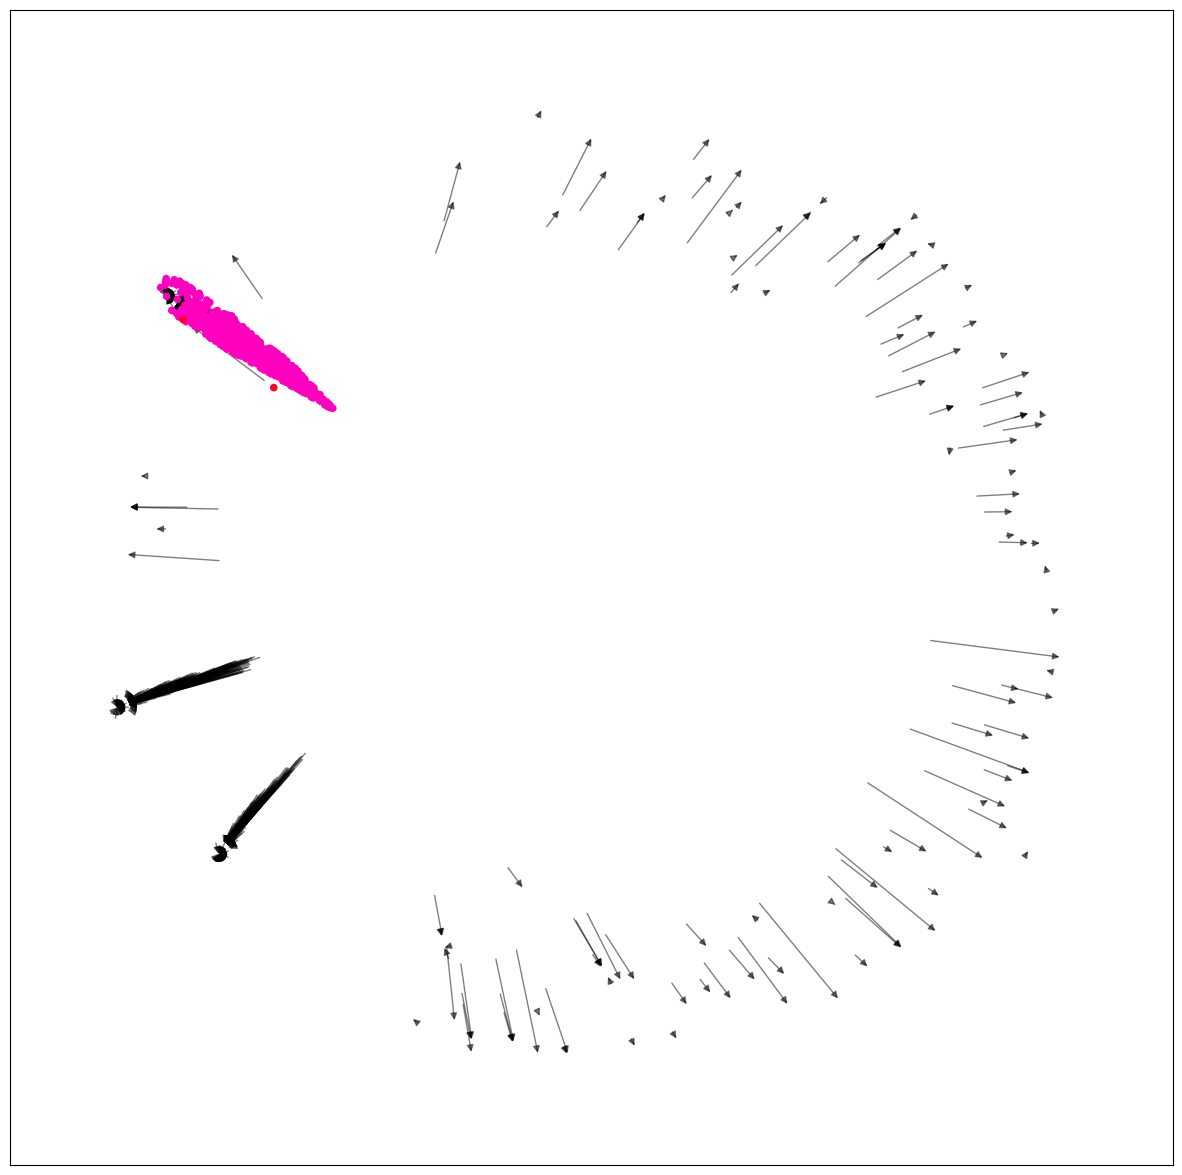

In [51]:
list_of_id1 = []

for i in filled_table1['id']:
  list_of_id1.append(i)

list_of_city_id1 = []

for i in filled_table1['city.id']:
  list_of_city_id1.append(int(i))

print(list_of_city_id1)

print(list_of_id1)

print(len(list_of_id1))

print(len(list_of_city_id1))
f2 = open('edge_list1.txt', 'w', encoding='utf-8')

for i in range(len(list_of_id1)):
  print(list_of_id1[i], list_of_city_id1[i], file = f2)

f2.close()

G = nx.read_edgelist('edge_list.txt', create_using=nx.DiGraph())
print('Количество вершин: {}'.format(G.number_of_nodes()))
print('Количество рёбер: {}'.format(G. number_of_edges()))
print(' Среднее количество соседей у узлов в графе: {}'.format(round(G.number_of_edges() / float(G.number_of_nodes()), 4)))
if nx.is_directed(G):
  if nx.is_weakly_connected(G):
    print('Граф является направленным и состоит из одной компоненты слабой связности.')
  else:
    print('Граф является направленным и состоит из нескольких компонент.')
else:
  if nx.is_connected(G):
    print('Граф является ненаправленным и связным.')
  else:
    print('Граф является ненаправленным и состоит из нескольких компонент.')
G_weak = G.subgraph(max(nx.weakly_connected_components(G), key=len))
print('Количество вершин: {}'.format(G_weak.number_of_nodes()))
print('Количество рёбер: {}'.format(G_weak.number_of_edges()))
print('Среднее количество соседей у узла в графе: {}'.format(round(G_weak.number_of_edges() / float(G_weak.number_of_nodes()), 4)))
G_strong = G.subgraph(max(nx.strongly_connected_components(G), key=len))
print('Количество вершин: {}'.format(G_strong.number_of_nodes()))
print('Количество рёбер: {}'.format(G_strong.number_of_edges()))
print('Среднее количество соседей у узла в графе: {}'.format(round(G_strong.number_of_edges() / float(G_strong.number_of_nodes()), 4)))
plt.figure(figsize=(15, 15))
plt.title('Cities')
nx.draw(G, node_size=5)
plt.show()
degree = dict(G.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(x) for x in degree_values]
plt.figure(figsize=(10, 10))
plt.plot(degree_values, hist, 'ro-')
plt.legend(['Degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.show()
G_undirected = G_weak.to_undirected()
partition = cl.best_partition(G_undirected)
communities = set(partition.values())
communities_dict = {c: [k for k, v in partition.items() if v == c] for c in communities}
highest_degree = {k: sorted(v, key=lambda x: G.degree(x))[-5:] for k, v in communities_dict.items()}
print('Количество сообществ: ', len(highest_degree))
print('Количество элементов в выделенных сообществах:', ', '.join([str(len(highest_degree[key])) for key in highest_degree]))

pos = nx.spring_layout(G)

plt.figure(figsize=(15, 15))

cmap = cm.get_cmap('gist_rainbow', max(partition.values()) + 1)

nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20, cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.show()